## Constants

In [180]:
BV_ss = 4.3
Ht_ss = 0.42
Ht_ds = 0.336
MCV_ss = 90*10**(-15)

BV_loss = 1 #L

Fe_molar = 55.845
Tf_molar = 79_000

Hg_count = 270 * 10 ** 6 # Literature
Hg_molar = 65_000 # g/mol, Da, Literature (Journal of Biological Chemistry)
heme_molar = 616.487 # g/mol, Literature 

Avogadro_num = 6.022*10**23 # molecules / mol

heme_count = Hg_count * 4 # molecules heme per RBC
convert_num_heme_to_RBC = 1/heme_count
convert_mol_heme_to_RBC = 1/(heme_count/Avogadro_num) # mol heme per RBC

time_to_correct_days = 14 * 7 # 14 weeks -> days

# SS

In [28]:
n3 = 3.22*10**(-5)
n4 = 2.69*10**(-5)
n5 = 2.65*10**(-6)
n6 = n5

print(f'{n4*Fe_molar + n6*(Tf_molar+2*Fe_molar) - n3*Fe_molar - n5*Tf_molar:.15f}')
print(n4*Fe_molar*1000)
print(n6*(Tf_molar+2*Fe_molar)*1000)
print(n3*Fe_molar*1000)
print(n5*Tf_molar*1000)

print(1.5+209.6-209.3-1.8)

0.000000000000000
1.5022305000000002
209.64597849999996
1.798209
209.35
-1.709743457922741e-14


In [181]:
heme_flow_rate = 3.6*10**(-4)
conversion_factor = 1/(heme_count/Avogadro_num) # mol heme per RBC

print(heme_flow_rate*conversion_factor/Avogadro_num)

heme_moles = heme_count/Avogadro_num # heme moles / RBC
g_RBC = heme_moles*heme_molar # g/RBC

print(200*10**9*g_RBC*1000)
print(175*10**9*g_RBC*1000)

excess_molar = heme_molar - Fe_molar # g/mol
excess_g_RBC = (heme_moles*(heme_molar-Fe_molar)) # g excess / RBC degraded
print(200*10**9*excess_g_RBC/excess_molar)
print(175*10**9*excess_g_RBC/excess_molar)


3.333333333333334e-13
221.12453005645963
193.4839637994022
0.0003586848223181668
0.00031384921952839595


### Blood Change: RBC

In [175]:
BV_ss = 4.3
Ht_ss = .42
plasma_volume_ss = BV_ss*(1-Ht_ss)
MCV = 90*10**(-15)

print(f'RBC total healthy:  {BV_ss*Ht_ss/MCV:,} ')

BV_temp = BV_ss-BV_loss # instant. blood loss
RBC_V_new = BV_temp*Ht_ss # new RBC volume
Ht_new = RBC_V_new/BV_ss # new hematocrit after filling with plasma
print(f'RBC total new:      {BV_ss*Ht_new/MCV:,}')
print(f'RBC diff:           {-BV_ss*Ht_new/MCV + BV_ss*Ht_ss/MCV:,}')
print(f'Ht new:             {Ht_new:.3f}')
print()
print(f'Plasma Vol old:     {BV_ss*(1-Ht_ss):.2f} L ')
print(f'Plasma Vol new:     {BV_ss*(1-Ht_new):.2f} L')
print(f'Plasma Vol change:  {-BV_ss*(1-Ht_ss) + BV_ss*(1-Ht_new):.2f} L')
print()
print(f'RBC Vol old:        {BV_ss*Ht_ss:.2f} L')
print(f'RBC Vol new:        {BV_ss*Ht_new:.2f} L')
print(f'RBC Vol change:     {BV_ss*Ht_new - BV_ss*Ht_ss:.2f} L')

plasma_V_old = BV_ss*(1-Ht_ss)
plasma_V_new = BV_ss*(1-Ht_new)

RBC total healthy:  20,066,666,666,666.664 
RBC total new:      15,399,999,999,999.998
RBC diff:           4,666,666,666,666.666
Ht new:             0.322

Plasma Vol old:     2.49 L 
Plasma Vol new:     2.91 L
Plasma Vol change:  0.42 L

RBC Vol old:        1.81 L
RBC Vol new:        1.39 L
RBC Vol change:     -0.42 L


## RBC ACC Thought Process
$\dot{RBC} = \dot{Add} + \dot{Rem} $

In [317]:
#Specific Constants
time_extra = 50
step_size = 1000
fractional_step_size = int((step_size / time_to_correct_days)*(time_extra))
time_extra = 50

t_before = np.linspace(0, time_to_correct_days, step_size)
t_after = np.linspace(time_to_correct_days, (time_to_correct_days+time_extra), fractional_step_size)
t = np.concatenate((t_before, t_after), axis=0)

### Rate of Deg


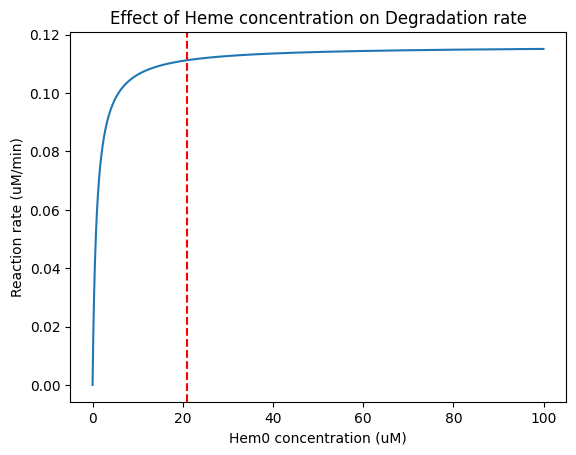

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Degradation
Km = 0.93 #uM
kcat = 3.5 #1/min
HO1 = 0.0332 # uM

Hem0 = np.arange(0, 100, 0.01)

v = np.zeros_like(Hem0) # initialize v array with zeros
for i in range(len(Hem0)):
    v[i] = (kcat * Hem0[i] * HO1) / (Km + Hem0[i])

plt.plot(Hem0, v)
plt.xlabel('Hem0 concentration (uM)')
plt.ylabel('Reaction rate (uM/min)')
plt.title('Effect of Heme concentration on Degradation rate')
plt.axvline(x=21, color='r', linestyle='--')
plt.show() 

### Plasma Volume Function (dependency)

Text(0.5, 1.0, 'Plasma Volume over Time in Dynamic State')

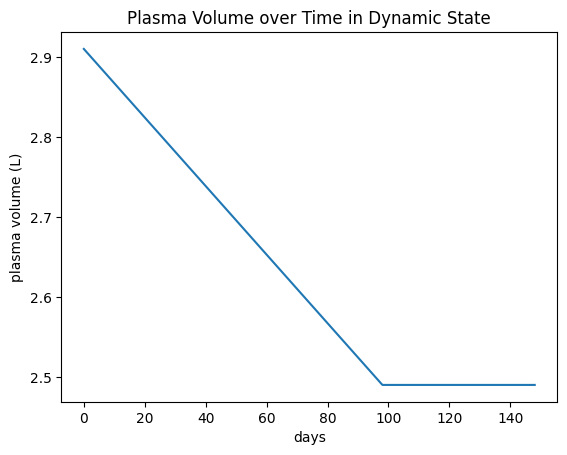

In [199]:
import numpy as np
import matplotlib.pyplot as plt

def plasma_volume(t):
    plasma_initial = 2.91
    plasma_final = 2.49
    new_volume = plasma_initial - (plasma_initial - plasma_final)*t/(time_to_correct_days)
    if plasma_final > new_volume:
        return plasma_final
    else:
        return new_volume

time = np.linspace(0, time_to_correct_days+time_extra, 1000)
plasma_volume_arr = [plasma_volume(t) for t in time]
plt.plot(time, plasma_volume_arr)
plt.xlabel('days')
plt.ylabel('plasma volume (L)')
plt.title('Plasma Volume over Time in Dynamic State')

### Degradation Rate $\dot D(t)$

$ \dot D(t) = \bold{0.10 ~\mu M/min} * \frac{V_{old, plasma}}{V_{new, plasma}(t)}*V_{old, plasma}*\frac{1}{4*270*10^6}*(10^{-6})*(6.022*10^{23})*60*24 ~ RBC/day$ 

In [382]:
import numpy as np

heme_ss = 21 # uM                                

def degradation_rate(time):
    # heme is in uM
    Km = 0.93 #uM
    kcat = 3.5 #1/min
    HO1 = 0.0332 # uM
    heme = 21
    rate_uM_min = (kcat * heme * HO1) / (Km + heme) # uM/min
    
    return rate_uM_min * plasma_volume(time) * Avogadro_num / ( (4 * 270*10**6) * (10 ** 6) * 60 ) # RBC / sec

def rate_D_before(time):
    deg_rate = 0.10
    
    plasma_initial = 2.91
    plasma_final = 2.49
    
    def plasma_volume(t):
        plasma_initial = 2.91
        plasma_final = 2.49
        new_volume = plasma_initial - (plasma_initial - plasma_final)*t/(time_to_correct_days)        
        return new_volume

    fractional_volume = 2.49 / plasma_volume(time)
    convert_min_to_day = 60 * 24
        
    val = deg_rate * fractional_volume * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
    return val

def rate_D_after(time):
    deg_rate = 0.10
    
    plasma_initial = 2.91
    plasma_final = 2.49

    fractional_volume = 1
    convert_min_to_day = 60 * 24
        
    val = deg_rate * fractional_volume * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
    return val
    
def rate_D_integral_before(time):
    D0 = 0
    deg_rate = 0.10
    
    plasma_initial = 2.91
    plasma_final = 2.49
    convert_min_to_day = 60 * 24
    a = (plasma_initial - plasma_final)/(time_to_correct_days)
    k = deg_rate * plasma_final * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
    
    constant_D_before = D0 + (k * np.log(plasma_initial) / a)
    return (-k * np.log(np.absolute(plasma_initial - a*time)) / a) + constant_D_before

def rate_D_integral_after(time):
    D0 = 0
    deg_rate = 0.10
    
    plasma_initial = 2.91
    plasma_final = 2.49
    convert_min_to_day = 60 * 24
    k = deg_rate * plasma_final * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
    
    constant_D_after = D0
     
    return (k * time / plasma_final) + constant_D_after

ending deg rate: 199930400000.0


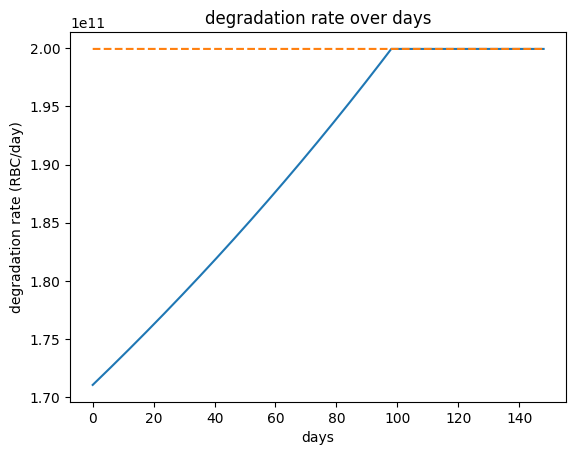

In [385]:
deg_rate_before_arr = rate_D_before(t_before)
deg_rate_after_arr = np.resize(rate_D_after(t_after), len(t_after))
deg_rate_arr = np.concatenate((deg_rate_before_arr, deg_rate_after_arr), axis=0)
synth_rate_arr = [rate_S(t) for t in t]

plt.plot(t, deg_rate_arr)
plt.xlabel('days')
plt.ylabel('degradation rate (RBC/day)')
plt.title('degradation rate over days')

plt.plot(t, synth_rate_arr, linestyle='--')
print(f'ending deg rate: {deg_rate_arr[-1]}')
assert synth_rate_arr[-1]-deg_rate_arr[-1] == 0

### Synthesis Rate $\dot S(t)$

$ \dot{S} = {.~}\bold{200 * 10^9 ~RBC/day} $

$ S(t) = kt$

In [384]:

synth_rate = 199_930_400_000 # RBC/day
#233 works

def rate_S(t):
    return synth_rate

def rate_S_integral(time):
    S0 = 0
    constant_S = S0
    return synth_rate*time + constant_S

print(f'{synth_rate*time_to_correct_days:,}')
print(f'{rate_D_before(0)}')

19,593,179,200,000
171074465979.38144


### RBC Acc. Function

$ \dot{ACC} = \dot{S} - \dot{D} $

Target:
$\int \dot S(t)dt - \int \dot D(t)dt = 4.67 * 10^{12} ~RBC$

(1510,)
(1000,)
(510,)


Text(0.5, 1.0, 'Added Red Blood Cells over Time')

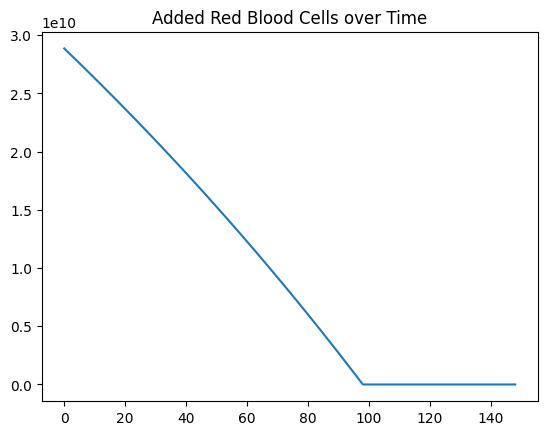

In [386]:
step_size = 1000
fractional_step_size = int((step_size / time_to_correct_days)*(time_extra))
time_extra = 50

t_before = np.linspace(0, time_to_correct_days, step_size)
t_after = np.linspace(time_to_correct_days, (time_to_correct_days+time_extra), fractional_step_size)
t = np.concatenate((t_before, t_after), axis=0)

s_arr = rate_S(t)
if isinstance(s_arr, (int, float)):
    s_arr = np.resize(s_arr, len(t))
print(s_arr.shape)

d_arr_before = rate_D_before(t_before)
d_arr_after = rate_D_after(t_after)
if isinstance(d_arr_after, (int, float)):
    d_arr_after = np.resize(d_arr_after, len(t_after))
print(d_arr_before.shape)
print(d_arr_after.shape)

d_arr = np.concatenate((d_arr_before, d_arr_after), axis=0)

diff = s_arr - d_arr
plt.plot(t, diff)
plt.title('Added Red Blood Cells over Time')
# plt.plot(t, s_arr, linestyle='--', color='r')
# plt.plot(t, d_arr, linestyle='--', color='g')

### Track RBC count

Text(0.5, 1.0, 'RBC Count over Time')

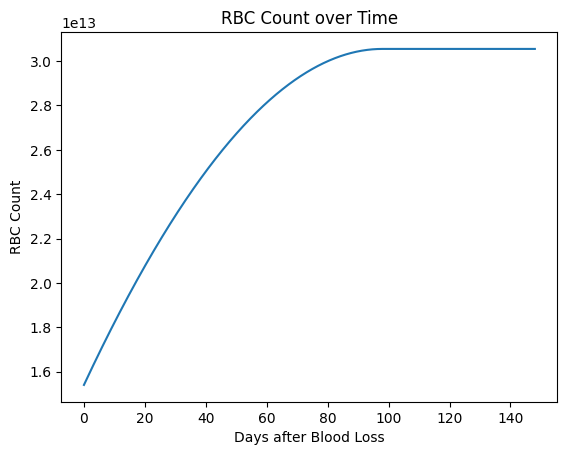

In [391]:
RBC_initial = BV_ss*Ht_new/MCV
RBC_final = BV_ss*Ht_ss/MCV

val_arr = np.zeros(shape=len(t))
val_arr[0] = RBC_initial
alt_arr = np.zeros(shape=len(t))
alt_arr[0] = RBC_initial
for i, time in enumerate(t):
    if i == 0:
        continue
    val_arr[i] = val_arr[i-1] + (s_arr[i] - d_arr[i])

plt.plot(t,val_arr)
plt.ylabel('RBC Count')
plt.xlabel('Days after Blood Loss')
plt.title('RBC Count over Time')
# plt.axhline(y=RBC_initial, color='r', linestyle='--')
# plt.axhline(y=RBC_final, color='b', linestyle='--')

# def lin_func(time):
#     return RBC_initial + (RBC_final-RBC_initial)*time/time_to_correct_days

# expected baseline
# plt.plot(t,lin_func(t))

<class 'numpy.ndarray'>
-1,487,345,147,574.0938


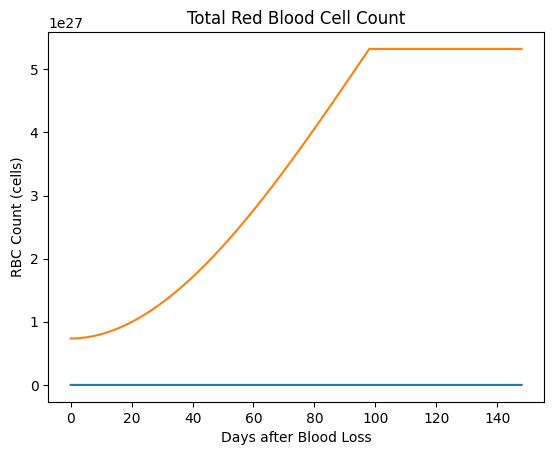

In [388]:
s_int = rate_S_integral(t)

d_int_before = rate_D_integral_before(t_before)
d_int_after = rate_D_integral_after(t_after)
print(type(d_int_before)), type(d_int_after)
d_int = np.concatenate((d_int_before, d_int_after), axis=0)

diff = s_int - d_int

RBC_initial = BV_ss*Ht_new/MCV
y_arr = np.zeros(len(t))
y_arr[0] = RBC_initial
for i, time in enumerate(t):
    if i == 0:
        continue
    y_arr[i] = y_arr[i-1] + s_int[i]*(t[i] - t[i-1]) - (d_int[i])*(t[i] - t[i-1])
# new_arr = list(map(lambda x: x/MCV*BV_ss, y_arr))
plt.plot(t, y_arr)
plt.plot(t, new_arr)
plt.ylabel('RBC Count (cells)')
plt.title('Total Red Blood Cell Count')
plt.xlabel('Days after Blood Loss')
# plt.axhline(y=RBC_initial, color='r', linestyle='--')
# plt.axhline(y=RBC_final, color='g', linestyle='--')

# plt.plot(t_before,lin_func(t_before), color='orange')
# plt.plot(t_after, np.resize([RBC_final], len(t_after)), color='orange')

print(f'{rate_D_integral_before(time_to_correct_days) - rate_S_integral(time_to_correct_days):,}')

In [ ]:
heme_flow_rate = 3.6*10**(-4)
conversion_factor = 1/(heme_count/Avogadro_num) # mol heme per RBC

print(heme_flow_rate*conversion_factor/Avogadro_num)

heme_moles = heme_count/Avogadro_num # heme moles / RBC
g_RBC = heme_moles*heme_molar # g/RBC

print(200*10**9*g_RBC*1000)
print(175*10**9*g_RBC*1000)

excess_molar = heme_molar - Fe_molar # g/mol
excess_g_RBC = (heme_moles*(heme_molar-Fe_molar)) # g excess / RBC degraded
print(200*10**9*excess_g_RBC/excess_molar)
print(175*10**9*excess_g_RBC/excess_molar)


3.333333333333334e-13
221.12453005645963
193.4839637994022
0.0003586848223181668
0.00031384921952839595


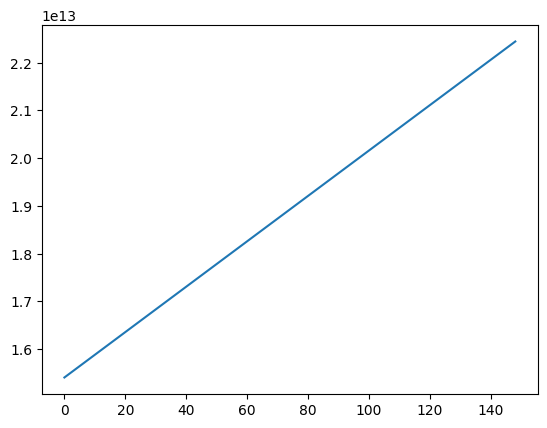

In [ ]:
plt.plot(t,lin_func(t))